In [80]:
import pandas as pd
import sys, os
import numpy as np
import pylab as plt
import astropy.io.fits as fits

%matplotlib nbagg

# Quickly plot 2D and 1D spectra from Binospec

# Load slit table

In [101]:
# Load slit csv file (output from Binomask)
slits = pd.read_csv(os.environ['BINO_DIR']+'2649_BLAS_1/masks/BLAS_1_slits.csv')

slits[slits.priority == 6.]

print(len(slits[slits.priority == 6.]))

69


# Load 2D spectra file

In [63]:
datadir = os.environ['BINO_DIR']+'SAO-9/combined_fluxcalib/combine_47_frames_seeing<1.00arcsec_2019-11-07/'

fname_data = datadir+"combined_fluxcalib_abs_slits_lin.fits"
fname_err  = datadir+"combined_fluxcalib_abs_err_slits_lin.fits"

# Plot 1D

In [69]:
def get_waveA(slit):
    wmin_nm = slit.header['CRVAL1']
    wmax_nm = slit.header['CRVAL1']+(slit.header['NAXIS1']-1)*slit.header['CDELT1']
    waveA   = 10*np.arange(wmin_nm, wmax_nm, step=slit.header['CDELT1'])
    return waveA

def extract1D_boxcar(dat2D, ypos, ywidth=4, dat_type='flux'):
    if dat_type == 'flux':
        dat1D = np.nansum(dat2D[ypos-int(ywidth/2):ypos+int(ywidth/2)], axis=0)
    elif dat_type == 'err':
        dat1D = np.sqrt(np.nansum(dat2D[ypos-int(ywidth/2):ypos+int(ywidth/2)]**2., axis=0))
    else:
        dat1D = None
    return dat1D

def get_1D_spectrum(slit, dat_type='flux'):
    
    dat2D = slit.data
    ypos = slit.header['SLITYPIX']
    
    return extract1D_boxcar(dat2D, int(ypos), dat_type=dat_type)

In [64]:
slits6 = slits[slits.priority == 6.]

hdu_list_flux = fits.open(fname_data)
hdu_list_err  = fits.open(fname_err)

waveA = get_waveA(hdu_list_flux[1])

# Plot S/N spectrum

<IPython.core.display.Javascript object>


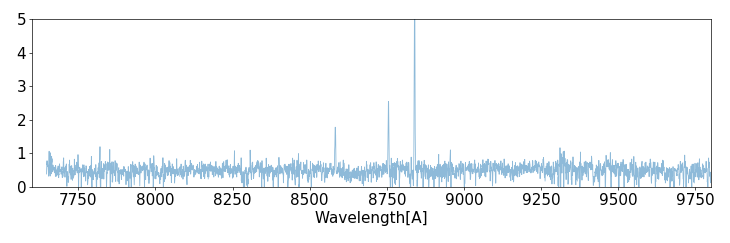

/home/cmason/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in divide
  # This is added back by InteractiveShellApp.init_path()


(0, 5)

In [104]:
i = 6

slit_data = hdu_list_flux[slits6.iloc[i].extnum]
slit_err  = hdu_list_err[slits6.iloc[i].extnum]

spec1D = get_1D_spectrum(slit_data)
err1D  = get_1D_spectrum(slit_err, dat_type='err')

plt.figure(figsize=(12,4), dpi=72)

plt.plot(waveA, spec1D/err1D, lw=1, alpha=0.5)

plt.xlabel('Wavelength[A]')

plt.tight_layout()
plt.xlim(7600, 9800)
plt.ylim(0, 5)